In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import sys
from datetime import datetime
sys.path.append('~/share/raspi_thermometer')
from raspi_thermometer.utilities import Thermometer
import pandas as pd
%matplotlib notebook

In [52]:
from __future__ import print_function
from raspi_thermometer.aws_utils import scan

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
data = scan()

In [48]:
def log_temperature(timestamp,temp,dbname):

    conn=sqlite3.connect(dbname)
    curs=conn.cursor()
    
    command = "INSERT INTO temps values('{}', {})".format(timestamp,temp,)
    curs.execute(command)

    # commit the changes
    conn.commit()

    conn.close()

In [43]:
datetime()

TypeError: Required argument 'year' (pos 1) not found

In [44]:
t = Thermometer()
t.read()
t.temp_F
dbname = '/var/www/templog.db'
log_temperature(datetime.now(),t.temp_F,dbname)

INSERT INTO temps values('2018-12-07 21:53:41.359922', 67.1506953125)


In [9]:
df = pd.DataFrame(data['Items']).sort_values(by=['timestamp']).reset_index(drop=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['temperature'] = df['temperature'].astype(float)

In [10]:
df['temperature_smoothed'] = df['temperature'].rolling(60,center=True).mean()

In [11]:
df.tail()

,temperature,timestamp,temperature_smoothed
14171,65.689479,2018-12-07 21:33:07.187178,NaN
14172,66.670391,2018-12-07 21:34:07.483342,NaN
14173,65.209754,2018-12-07 21:35:07.253992,NaN
14174,65.907298,2018-12-07 21:36:07.213464,NaN
14175,65.931951,2018-12-07 21:37:06.767128,NaN


<IPython.core.display.Javascript object>


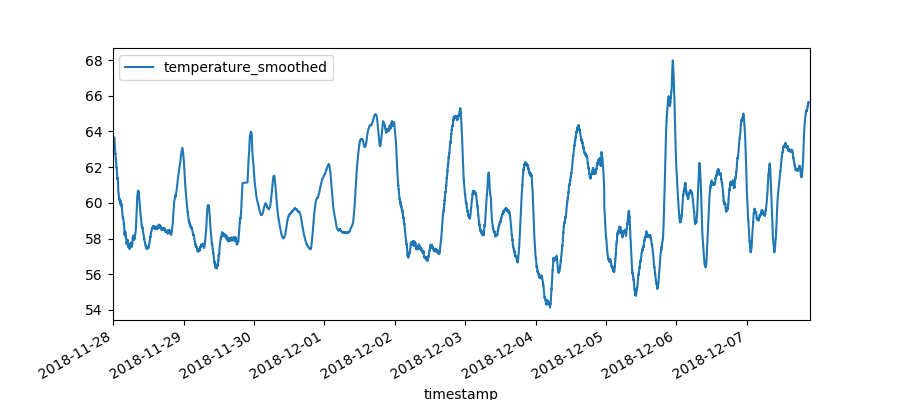

In [12]:
fig,ax=plt.subplots(figsize=(9,4))
# df.plot(x='timestamp',y='temperature',ax=ax)
df.plot(x='timestamp',y='temperature_smoothed',ax=ax)

In [13]:
row = df.iloc[-1]

In [45]:
row['timestamp']

Timestamp('2018-11-27 23:44:04.315000')

In [46]:
log_temperature(row['timestamp'],row['temperature'],dbname)

INSERT INTO temps values('2018-11-27 23:44:04.315000', 64.9121738281)


In [55]:
print('starting')
for idx,row in df.iterrows():
    log_temperature(row['timestamp'],row['temperature'],dbname)
    print('done with row {} of {}'.format(idx,len(df)),end='\r')

starting


In [9]:
import os

In [53]:
print('test',end=' ')

test 